<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/CarPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

sns.set(rc = {'figure.figsize': (20, 20)})


In [ ]:
data = pd.read_csv("car_data.csv")

FileNotFoundError: ignored

In [ ]:
####################################
data = data[data['Price'] != 'np.NaN']
columns_to_remove = ['URL','Comfort', 'Gas Equipment']

data.drop(columns=columns_to_remove, inplace=True)

data.drop(columns="Unnamed: 0", inplace=True)

data.rename(columns={"Price": "Car Price"}, inplace=True)
####################################

In [ ]:
data = data.dropna()
data

,Make,Model,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Car Price
0,Toyota,Camry,Sedan,2007,Hybrid,2.4 L,Automatic,All Wheel Drive,"61,000 km",Car is not damaged,Left,No,Silver,R18,Хenon Headlights,Gray,Velour,No,"$5,500"
1,Hyundai,Sonata,Sedan,2010,Gasoline,2.4 L,Automatic,Front Wheel Drive,"163,000 miles",Car is not damaged,Left,Yes,White,R17,Хenon Headlights,Gray,Textile,No,"$8,200"
2,Mercedes-Benz,CLA-Class,Sedan,2018,Gasoline,2.0 L,Automatic,All Wheel Drive,"51,000 km",Car is not damaged,Left,Yes,Black,R18,LED Headlights,Black,Leather,Panoramic Sunroof,"$28,000"
3,Mercedes-Benz,GLE-Class,SUV / Crossover,2017,Gasoline,3.5 L,Automatic,All Wheel Drive,"63,000 miles",Car is not damaged,Left,Yes,White,R19,LED Headlights,Beige,Leather,Panoramic Sunroof,"$39,999"
4,Lexus,ES,Sedan,2013,Hybrid,3.0 L,Automatic,Front Wheel Drive,"75,000 miles",Car is not damaged,Left,Yes,Silver,R17,Хenon Headlights,Gray,Leather,Regular Sunroof,"$22,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,Mercedes-Benz,C-Class,Sedan,2021,Gasoline,2.0 L,Automatic,Rear Wheel Drive,9000 km,Car is not damaged,Left,Yes,Silver,R18,LED Headlights,Black,Leather,Regular Sunroof,"$45,000"
4700,MINI,Cooper S Clubman,Wagon,2016,Gasoline,2.0 L,Automatic,Front Wheel Drive,"90,000 km",Car is damaged,Left,Yes,Brown,R17,Хenon Headlights,Red,Leather,Panoramic Sunroof,"$7,000"
4701,BMW,4 Series,Coupe,2017,Gasoline,2.0 L,Automatic,All Wheel Drive,"80,000 km",Car is not damaged,Left,Yes,Black,R18,LED Headlights,Black,Leather,Regular Sunroof,"$19,000"
4702,Hyundai,Sonata,Sedan,2012,Gasoline,2.4 L,Automatic,Front Wheel Drive,"155,000 km",Car is not damaged,Left,Yes,Black,R17,Halogen Headlights,Black,Leather,Panoramic Sunroof,"$12,000"


# Data Analysis

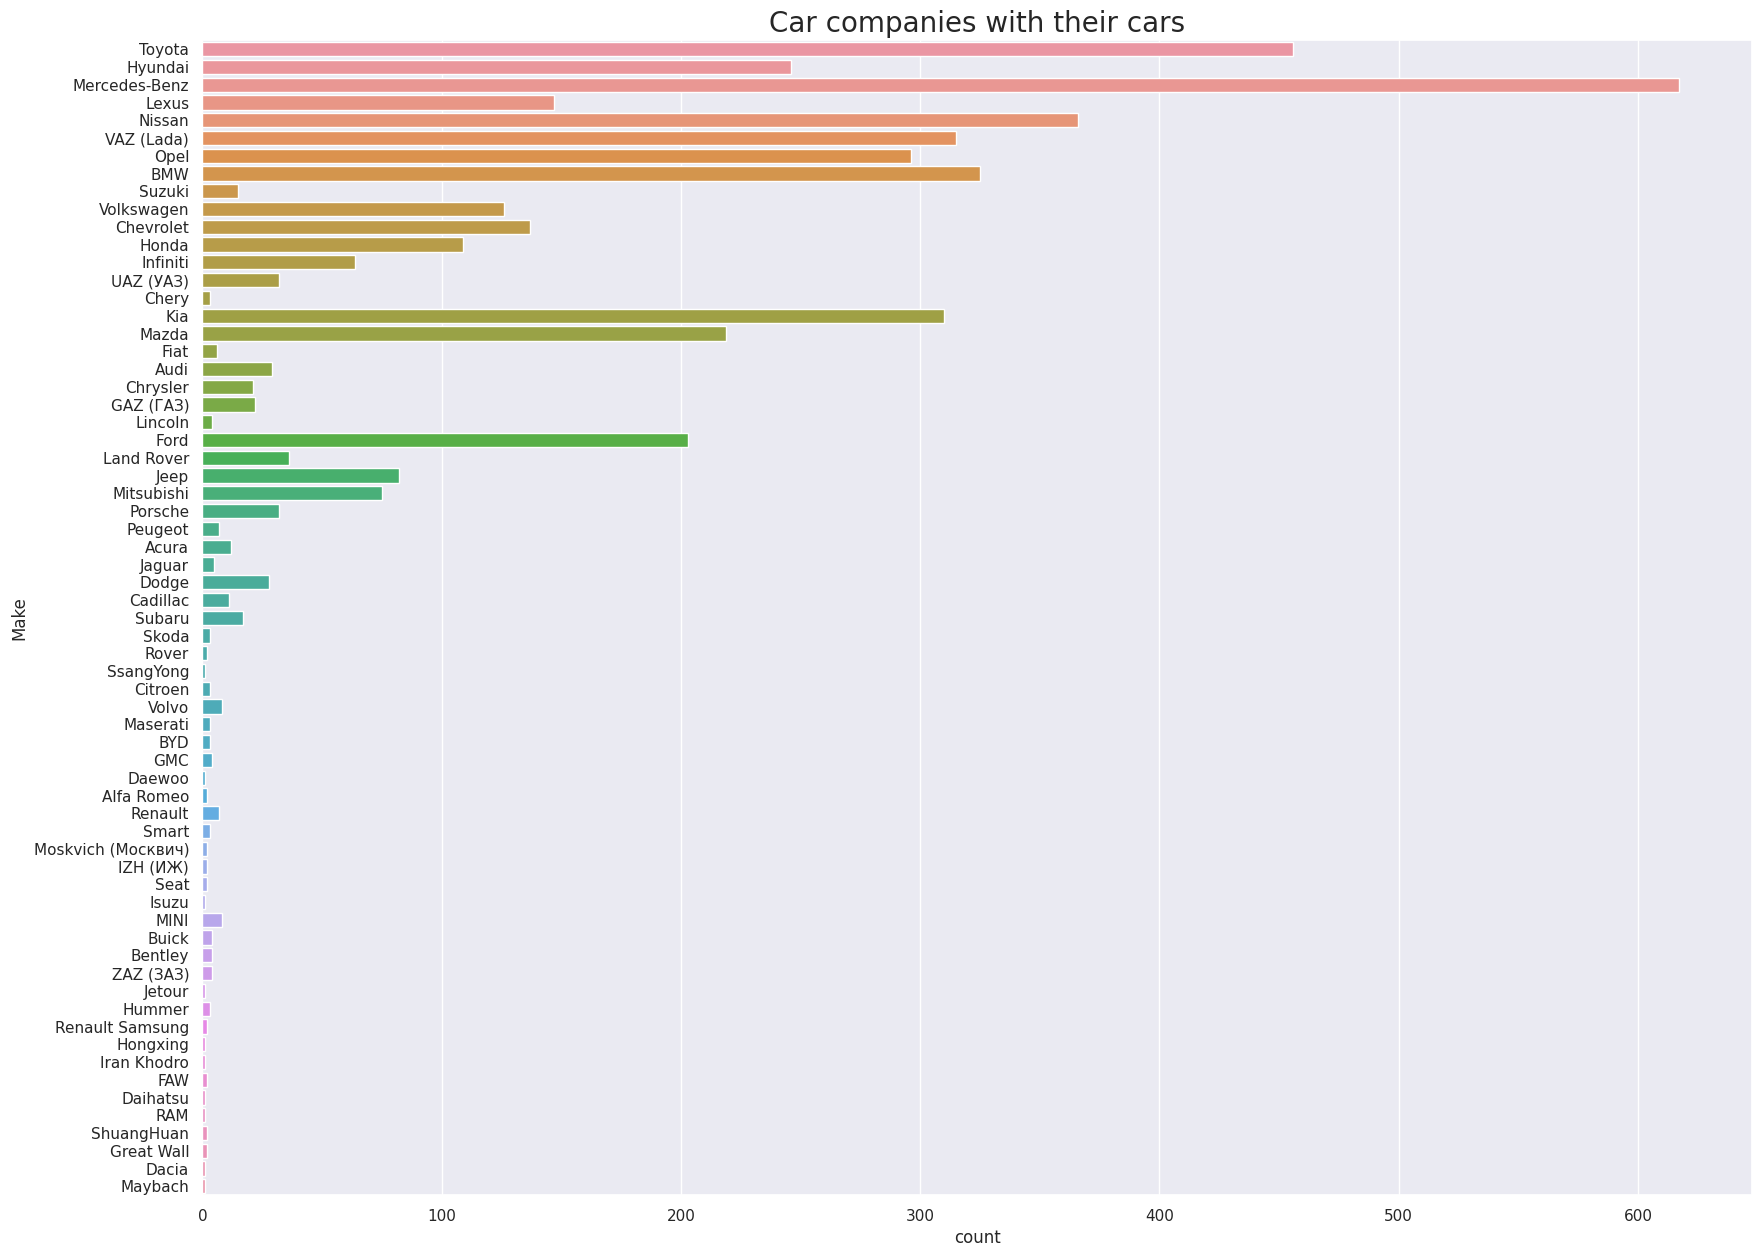

In [ ]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

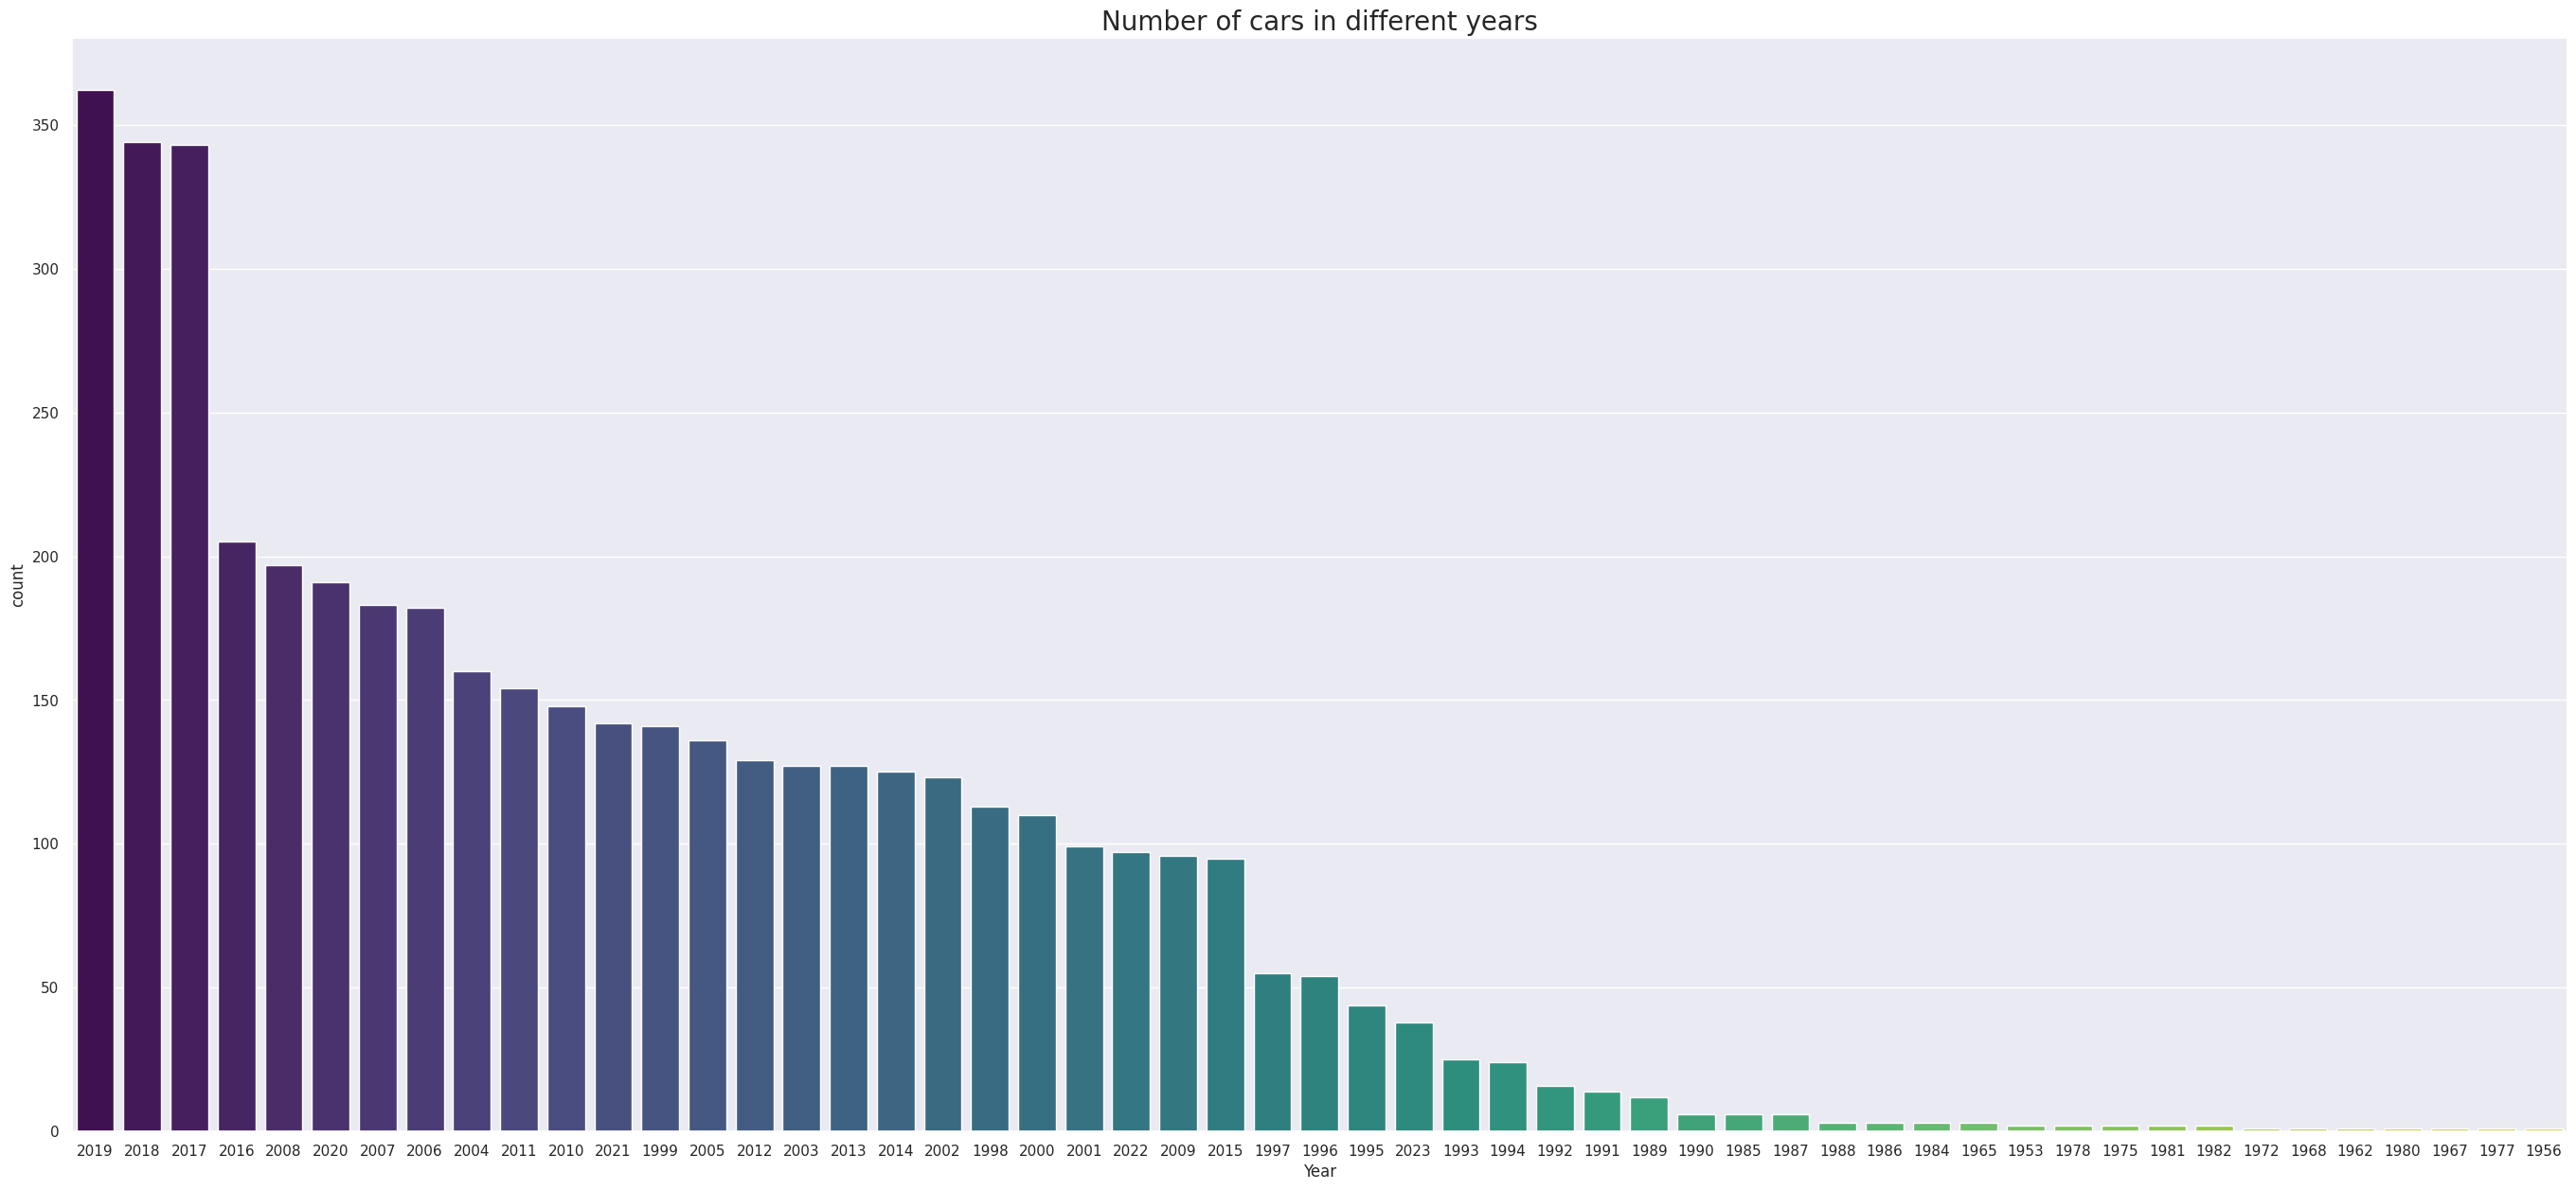

In [ ]:
data['Year'] = data['Year'].astype(int)
plt.figure(figsize = (34, 15))
sns.countplot(data, x="Year", order=data['Year'].value_counts().index, palette='viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

<Axes: >

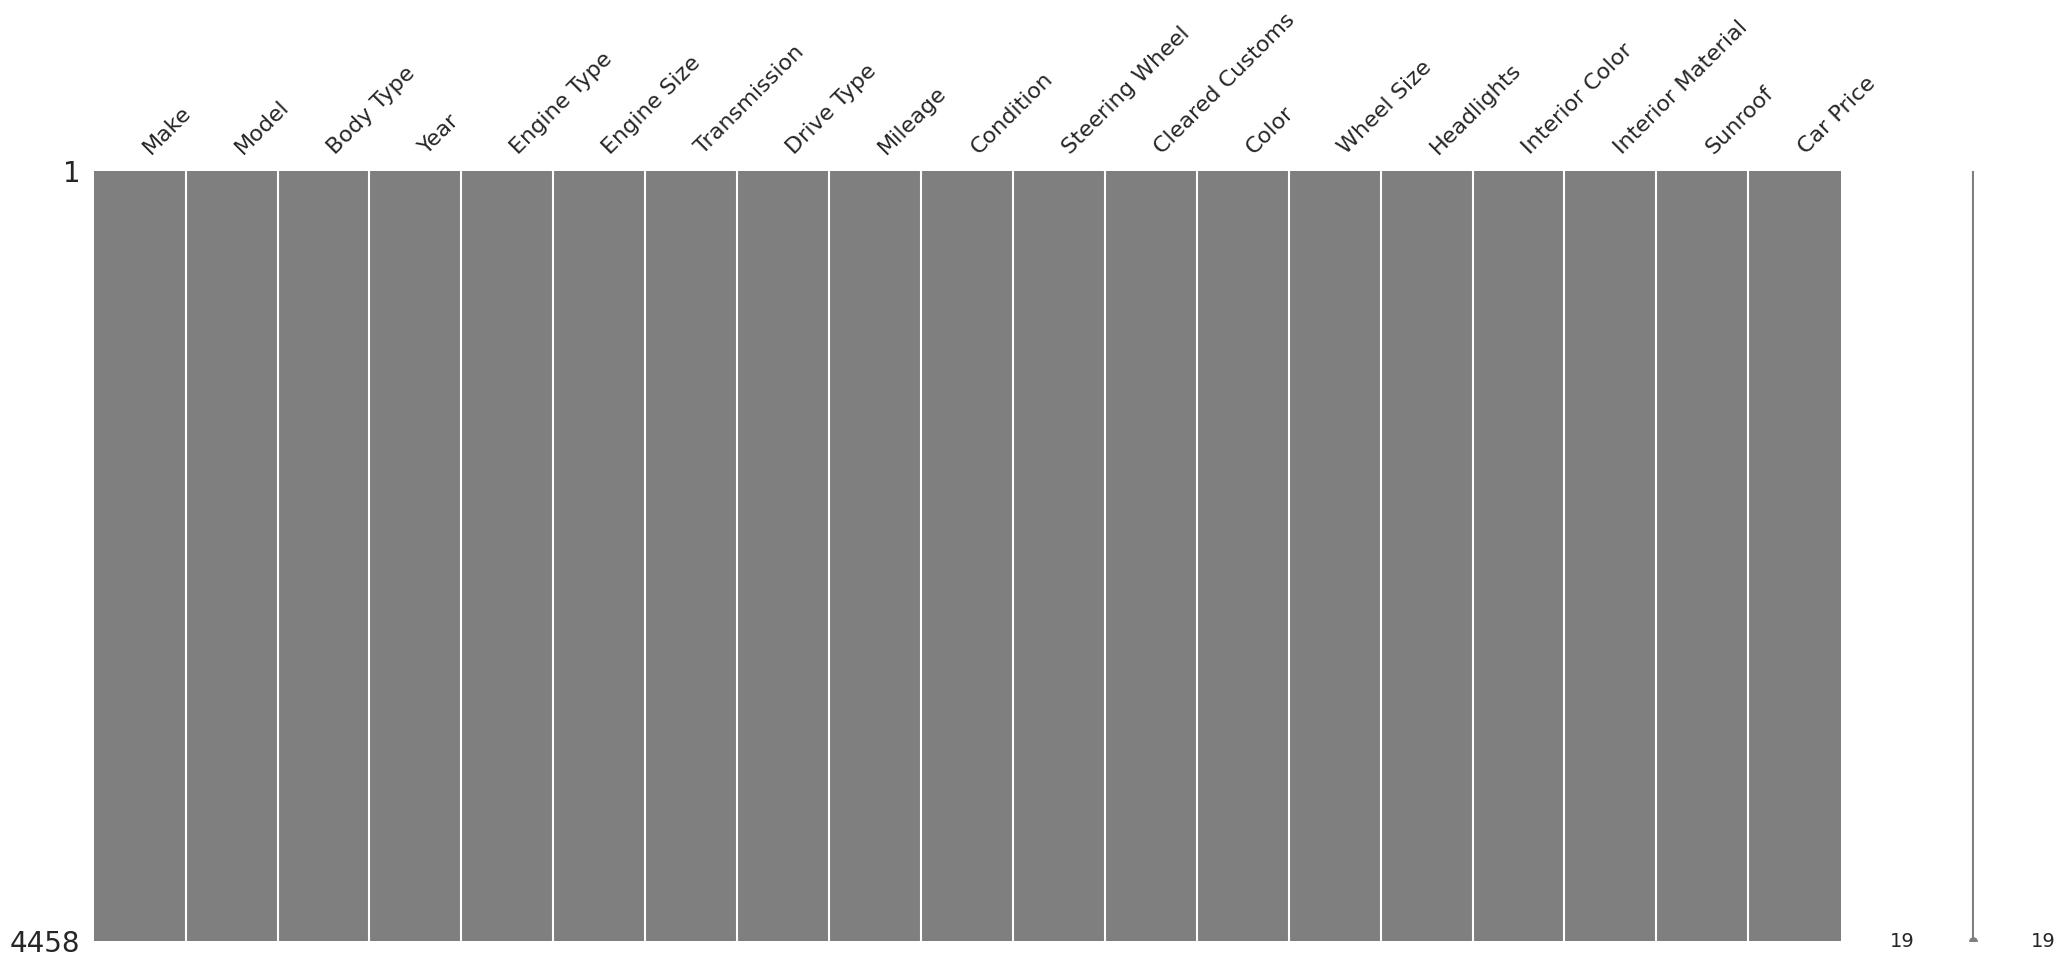

In [ ]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

In [ ]:
dram_condition = data['Car Price'].str[-1] == '֏'
dollar_condition = data["Car Price"].astype(str).str[0] == "$"
data.loc[dram_condition, 'Car Price'] = data.loc[dram_condition, 'Car Price'].str.replace(' ֏', '').str.replace(',', '').astype(np.float32) // 470
data.loc[dollar_condition, 'Car Price'] = data.loc[dollar_condition, 'Car Price'].str.replace('$', '').str.replace(',', '').astype(np.float32)


data['Engine Size'] = data['Engine Size'].str.replace(' L', '').astype(np.float32)

km_condition = data['Mileage'].str[-1] == 'm'
mile_condition = data["Mileage"].astype(str).str[-1] == "s"
data.loc[km_condition, 'Mileage'] = data.loc[km_condition, 'Mileage'].str.replace(' km', '').str.replace(',', '').astype(np.float32)
data.loc[mile_condition, 'Mileage'] = data.loc[mile_condition, 'Mileage'].str.replace(' miles', '').str.replace(',', '').astype(np.float32) * 1.6

<ipython-input-8-f257524f9145>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.loc[dollar_condition, 'Car Price'] = data.loc[dollar_condition, 'Car Price'].str.replace('$', '').str.replace(',', '').astype(np.float32)


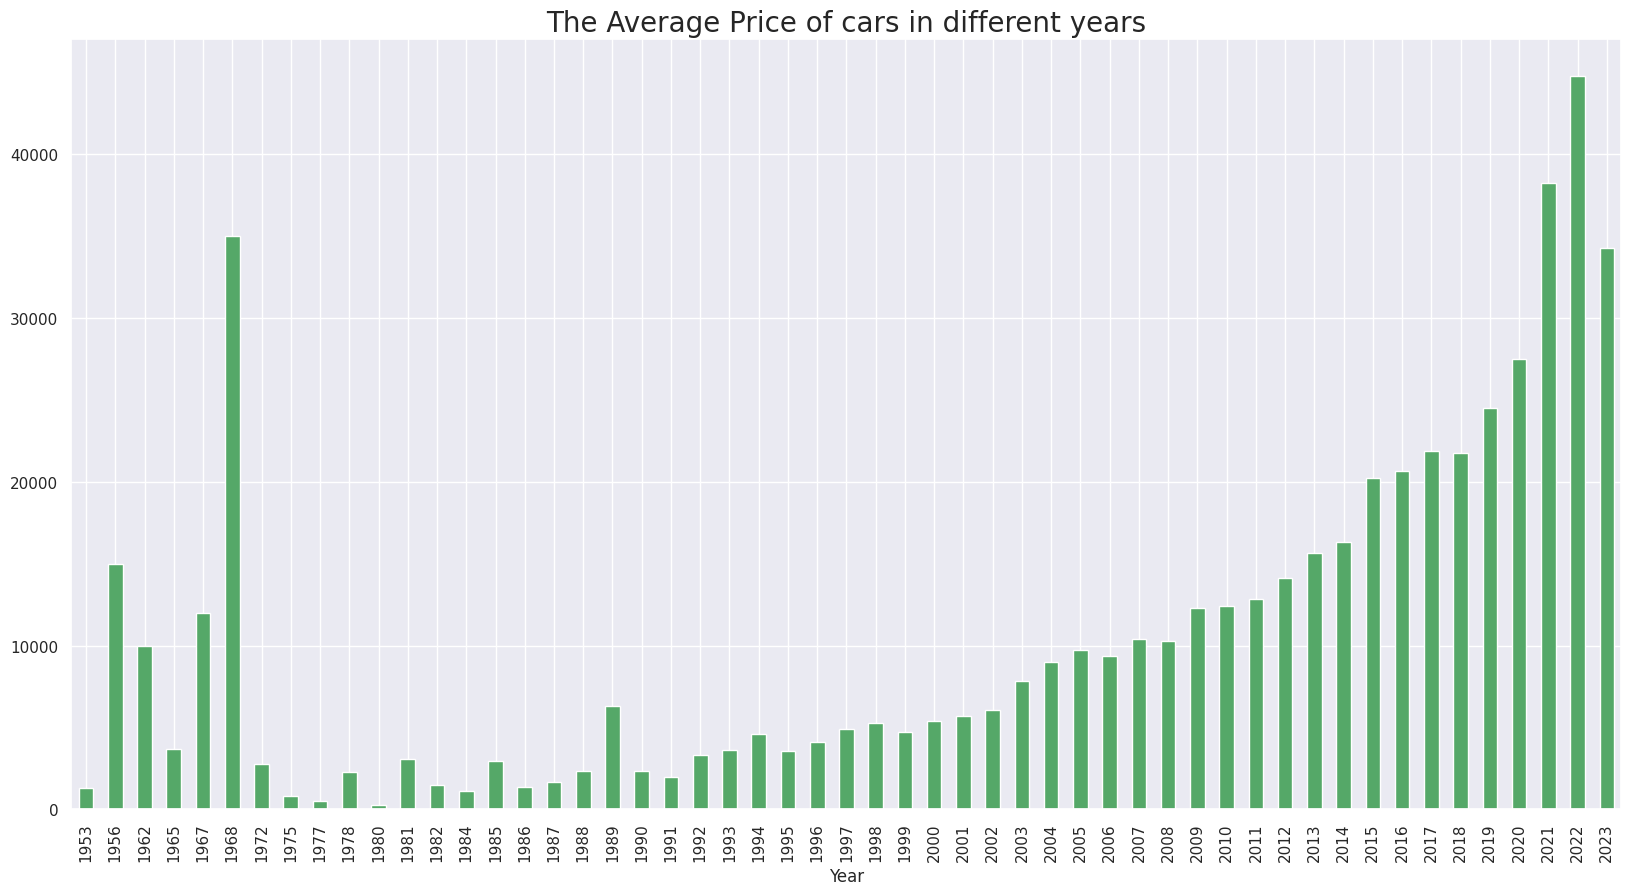

In [ ]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['Car Price'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

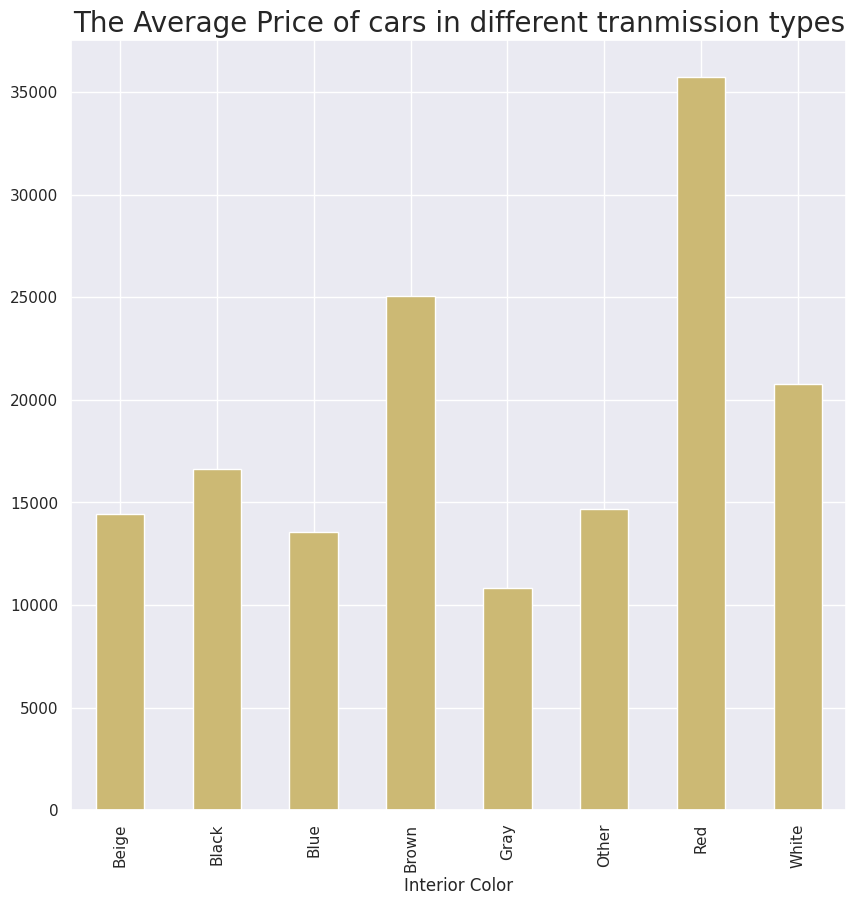

In [ ]:
plt.figure(figsize = (10, 10))
data.groupby('Interior Color')['Car Price'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()

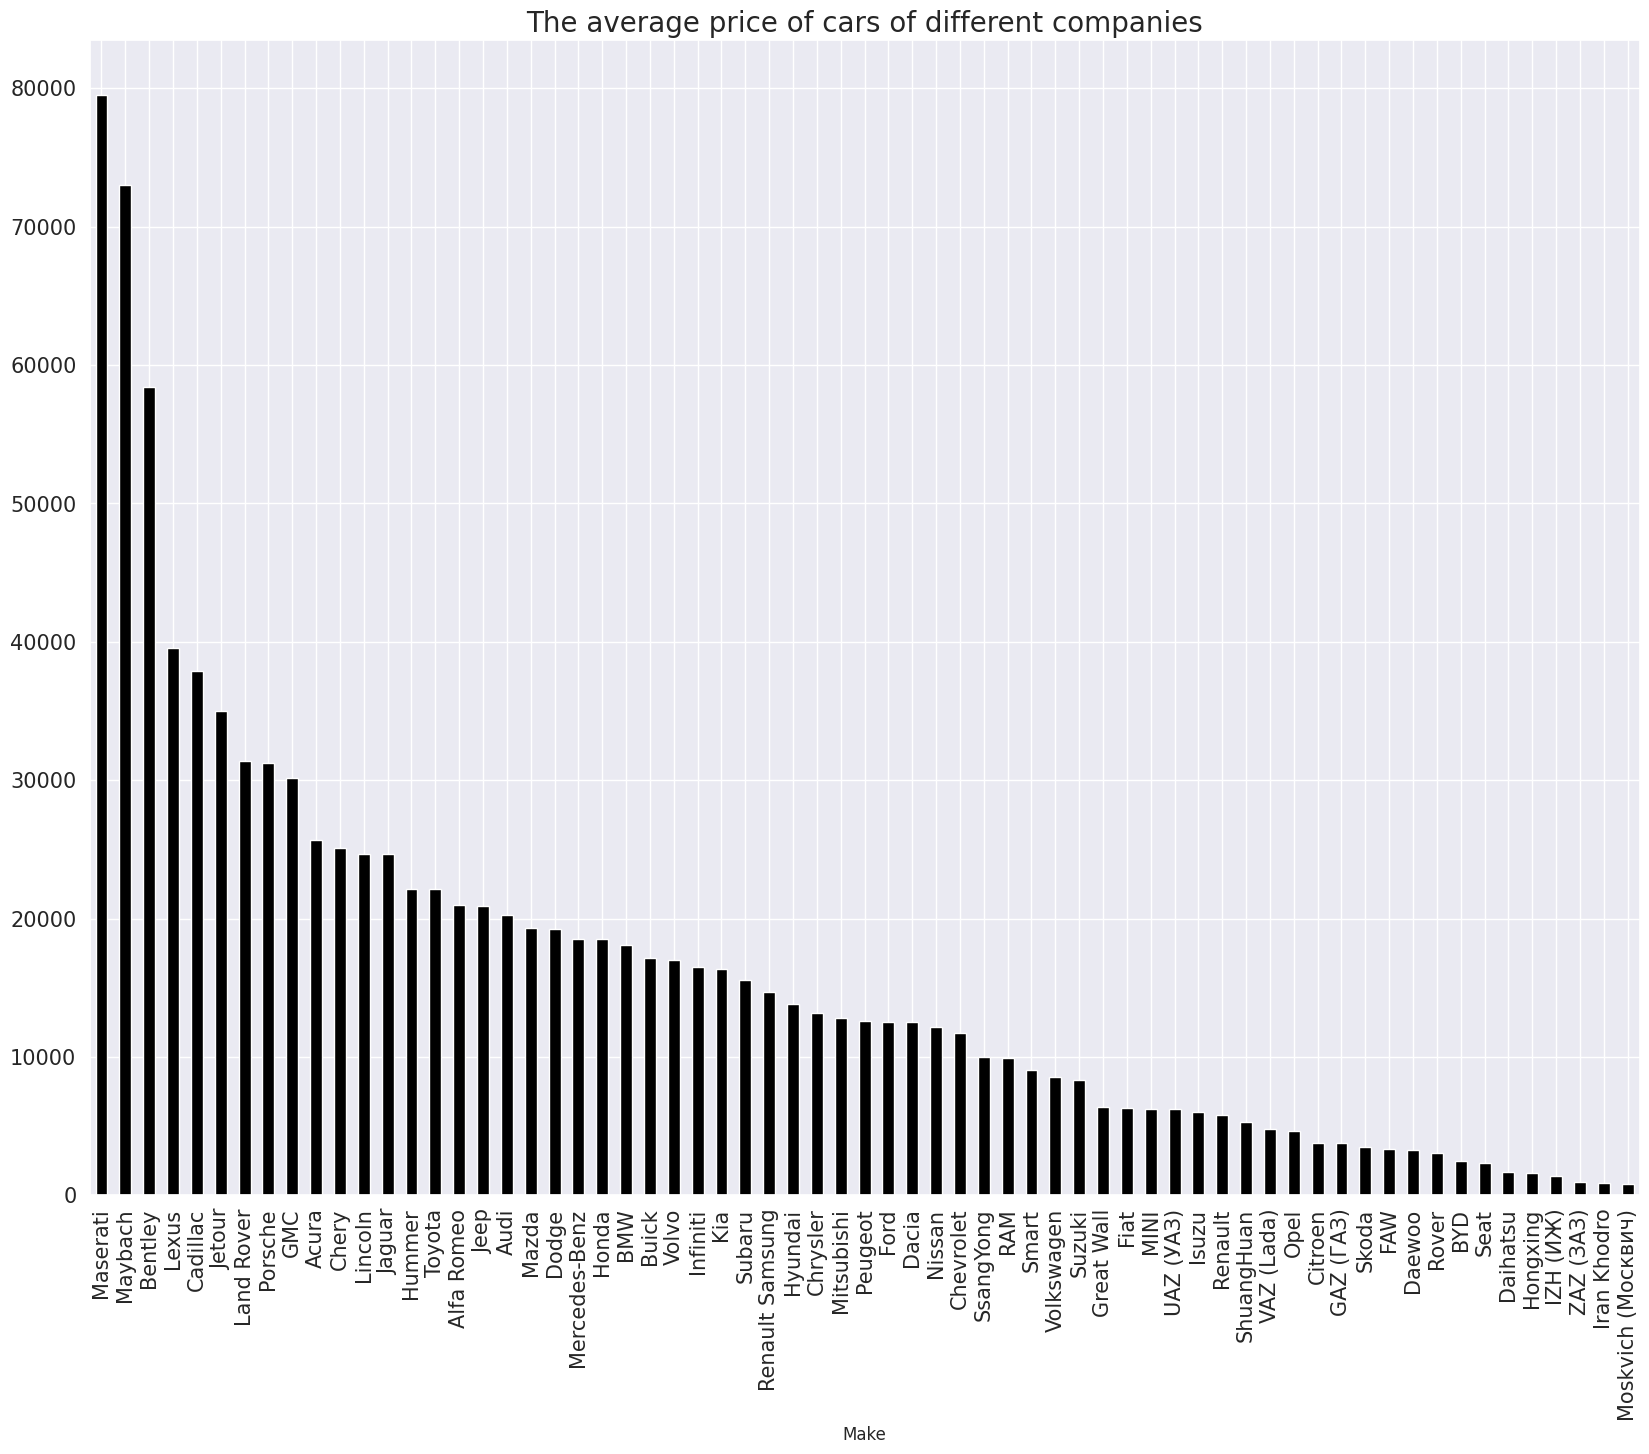

In [ ]:
plt.figure(figsize = (20, 15))
data.groupby(['Make'])['Car Price'].mean().sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

<ipython-input-12-55a0e5c9f962>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = data[numeric_columns].corr()


<Axes: >

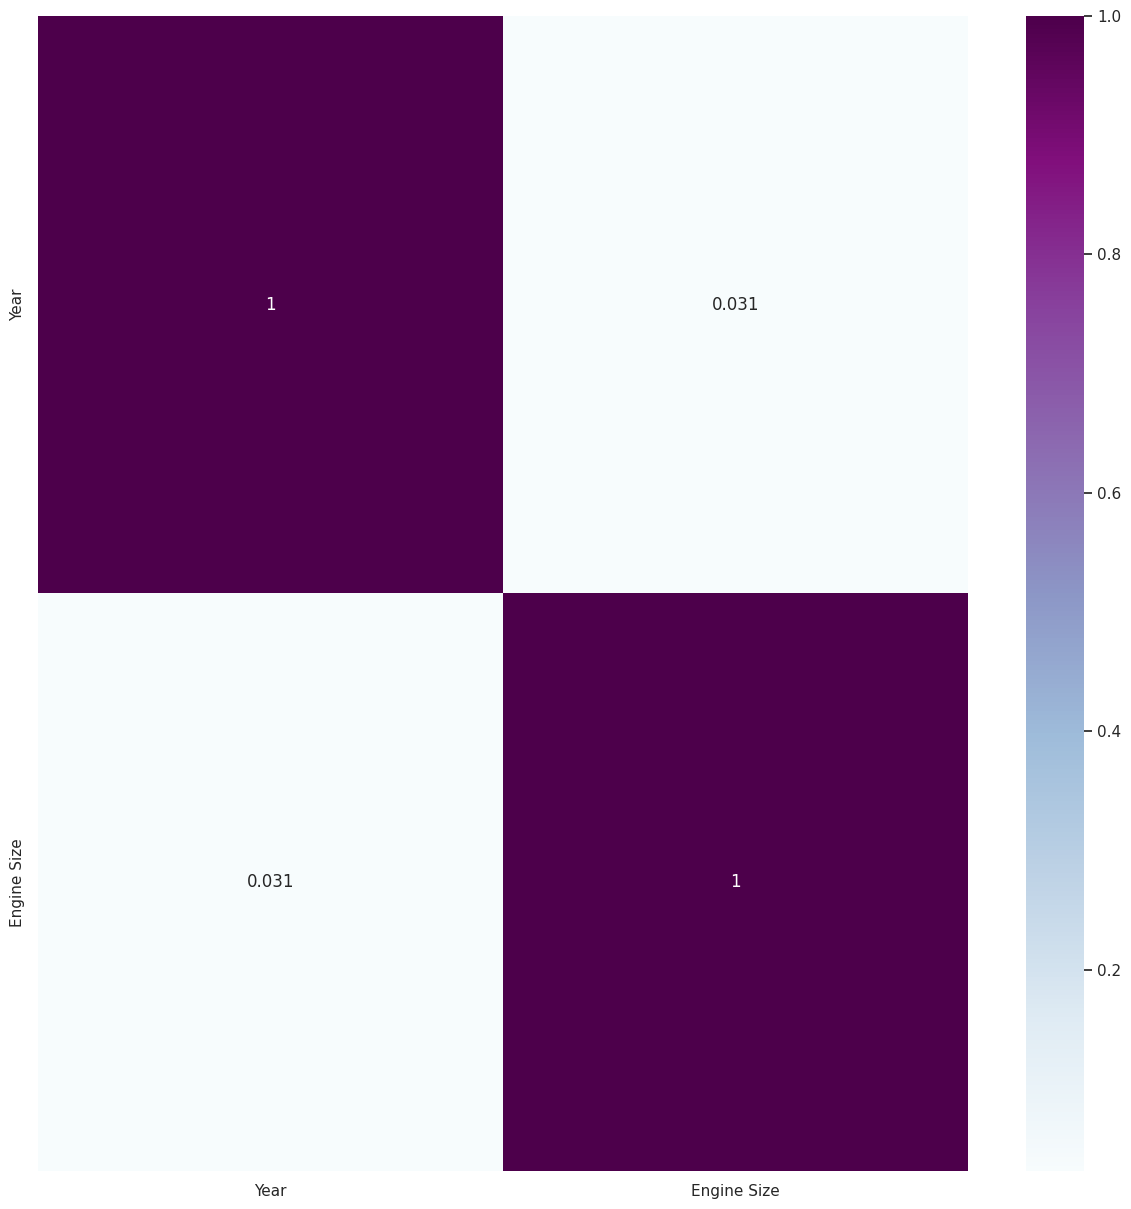

In [ ]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Year', 'Mileage', 'Engine Size']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

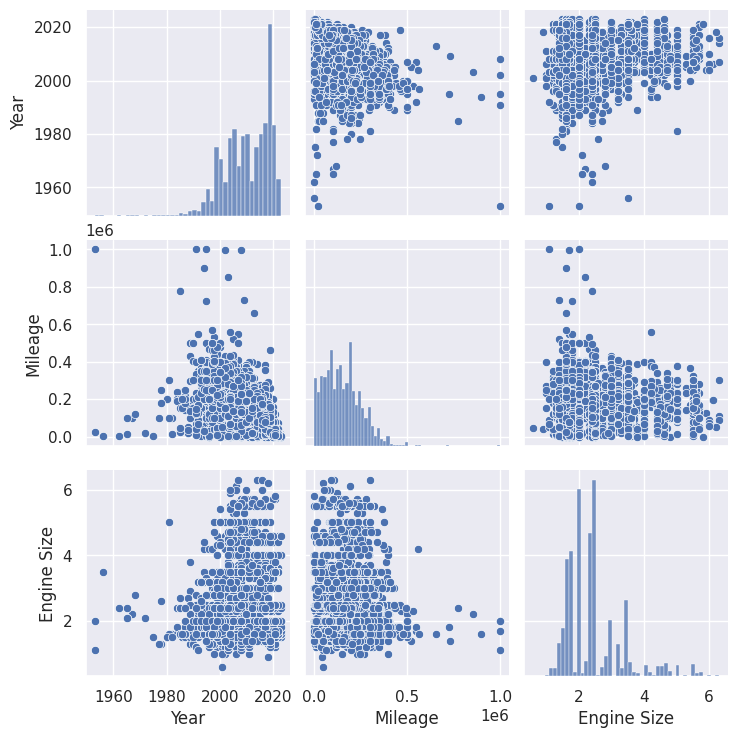

In [ ]:
sns.pairplot(data[numeric_columns])

# Processing and Training

In [ ]:
X = data.drop('Car Price', axis=1)
y = data['Car Price']

In [ ]:
X['Present Year'] = 2023
X['Year'] = X['Present Year'] - X['Year']
X.drop(['Present Year'], inplace = True, axis = 1)

In [ ]:
####################################
columns_to_remove = ['Make','Model', 'Engine Type', 'Color', 'Wheel Size', 'Headlights', 'Interior Color', 'Interior Material']

X.drop(columns=columns_to_remove, inplace=True)
####################################

In [ ]:
encoder = OneHotEncoder()
categorical_features = ['Make','Model',
                        'Body Type', 'Engine Type',
                                'Drive Type',    'Color', 'Wheel Size', 'Headlights', 'Interior Color', 'Interior Material',
                                'Sunroof']
encoder.fit(X[categorical_features])
one_hot_encoded_output_train = encoder.transform(X[categorical_features])
X.drop(columns=categorical_features, axis=1, inplace=True)
X = pd.merge(X, one_hot_encoded_output_train, how='left', on = X.index)
X.drop(columns=['key_0'], axis=1, inplace=True)

In [ ]:
X['Transmission'] = X['Transmission'].apply(lambda x: 0 if x == 'Manual' else 1)
X['Condition'] = X['Condition'].apply(lambda x: 0 if x == 'Car is damaged' else 1)
X['Steering Wheel'] = X['Steering Wheel'].apply(lambda x: 0 if x == 'Left' else 1)
X['Cleared Customs'] = X['Cleared Customs'].apply(lambda x: 0 if x == 'No' else 1)

<Figure size 1500x1500 with 0 Axes>

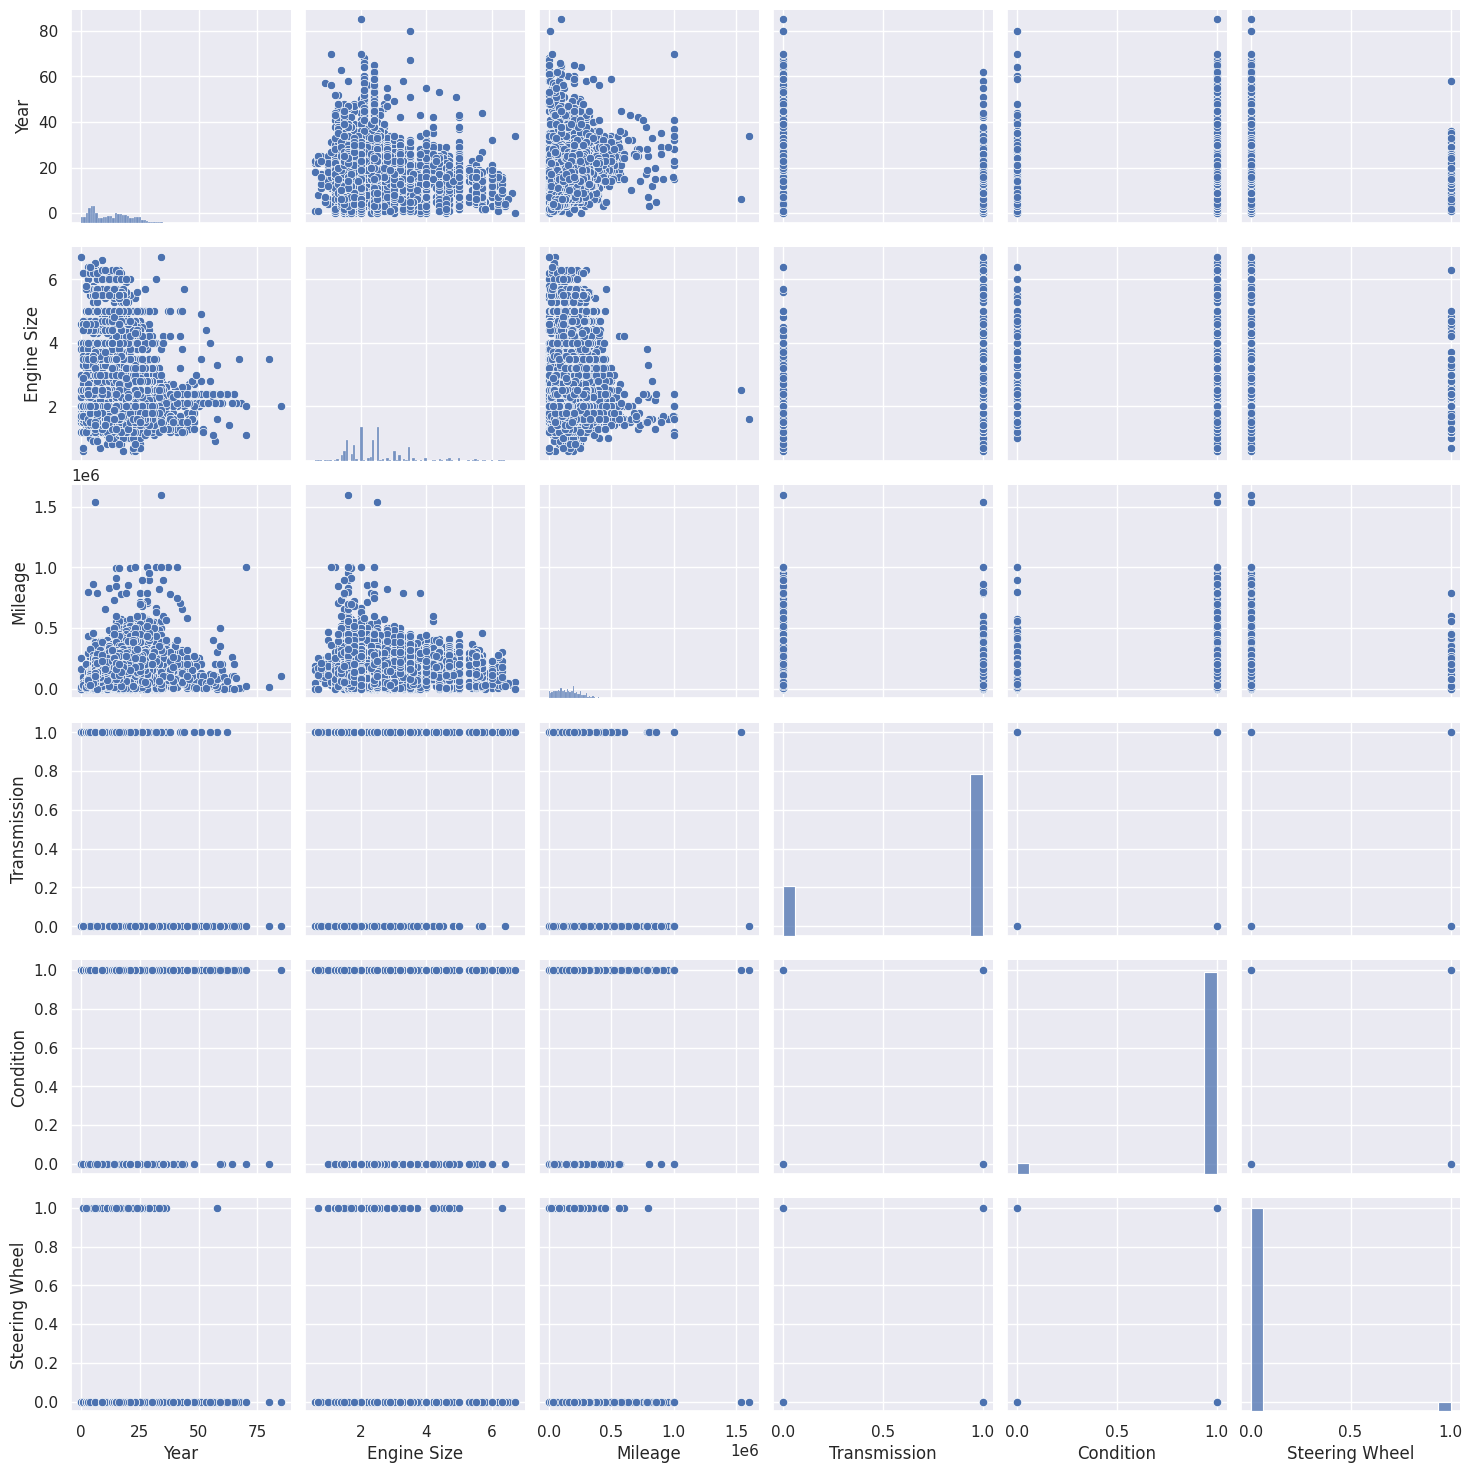

In [ ]:
plt.figure(figsize = (15, 15))
columns = ['Year', 'Engine Size', 'Mileage', 'Transmission', 'Condition', 'Steering Wheel']

sns.pairplot(X[columns])

In [ ]:
scaler = MinMaxScaler()
numeric_columns = ['Year', 'Engine Size', 'Mileage']
scaler.fit(X[numeric_columns])
X[numeric_columns] = scaler.transform(X[numeric_columns])

In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(200, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3000, batch_size=64)


Выходные данные были обрезаны до нескольких последних строк (5000).
56/56 [==============================] - 0s 4ms/step - loss: 899619.2500 - accuracy: 0.0000e+00
Epoch 502/3000
56/56 [==============================] - 0s 4ms/step - loss: 1031009.5000 - accuracy: 0.0000e+00
Epoch 503/3000
56/56 [==============================] - 0s 4ms/step - loss: 1027431.9375 - accuracy: 0.0000e+00
Epoch 504/3000
56/56 [==============================] - 0s 4ms/step - loss: 1088839.3750 - accuracy: 0.0000e+00
Epoch 505/3000
56/56 [==============================] - 0s 4ms/step - loss: 1003930.7500 - accuracy: 0.0000e+00
Epoch 506/3000
56/56 [==============================] - 0s 4ms/step - loss: 979605.1250 - accuracy: 0.0000e+00
Epoch 507/3000
56/56 [==============================] - 0s 4ms/step - loss: 983662.9375 - accuracy: 0.0000e+00
Epoch 508/3000
56/56 [==============================] - 0s 5ms/step - loss: 956380.6250 - accuracy: 0.0000e+00
Epoch 509/3000
56/56 [==============================] -

In [ ]:
model.save('car_price_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('car_price_model.h5')

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

28/28 [==============================] - 0s 3ms/step
Mean Absolute Error on Test Set: 3381.75


In [ ]:
mercedes_indexes = data[data['Make'] == 'Mercedes-Benz'].index
mercedes_indexes

Int64Index([   2,    3,   15,   21,   45,   54,   55,   85,   96,  101,
            ...
            4593, 4608, 4614, 4620, 4669, 4672, 4692, 4693, 4699, 4703],
           dtype='int64', length=617)

In [ ]:
len(mercedes_indexes)

617

In [ ]:
index = 713
y_pred = model.predict(np.expand_dims(X_test[index], axis=0))
y_test[index], y_pred

1/1 [==============================] - 0s 42ms/step


(11000.0, array([[11252.662]], dtype=float32))

28/28 [==============================] - 0s 2ms/step


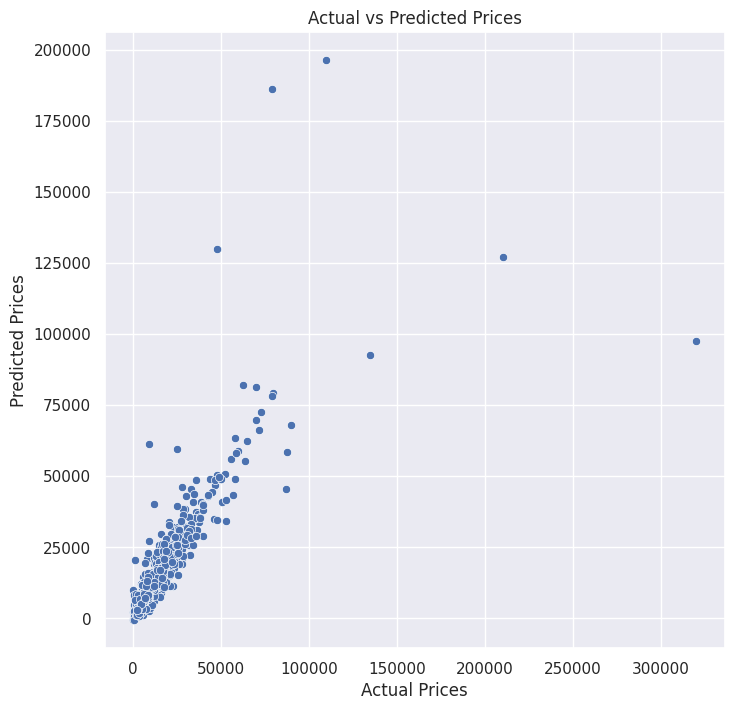

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#
# Plot actual vs predicted values
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual', y='Predicted', data=df_results)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [ ]:
sorted_indexes_test = np.argsort(y_test)

# Plot actual vs predicted values with sorted x-axis
plt.figure(figsize=(12, 6))

# Scatter plot for actual prices
plt.scatter(sorted_indexes_test, np.sort(y_test), label='Actual Prices', color='blue', marker='o')

# Scatter plot for predicted prices
plt.scatter(sorted_indexes_test, y_pred[sorted_indexes_test], label='Predicted Prices', color='red', marker='x')

plt.title('Actual vs Predicted Prices by Sorted Car Index')
plt.xlabel('Sorted Car Index')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
data[(data['Make'] == 'Mercedes-Benz') & (data['Model'] == 'E-Class') & (data['Year'] < 2008)& (data['Year'] > 2004)]


,Make,Model,Body Type,Year,Engine Type,Engine Size,Transmission,Drive Type,Mileage,Condition,Steering Wheel,Cleared Customs,Color,Wheel Size,Headlights,Interior Color,Interior Material,Sunroof,Car Price
105,Mercedes-Benz,E-Class,Sedan,2005,Gasoline,1.8,Automatic,Rear Wheel Drive,195000.0,Car is not damaged,Left,Yes,Silver,R17,LED Headlights,Black,Leather,Panoramic Sunroof,9500.0
231,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,All Wheel Drive,220000.0,Car is not damaged,Left,Yes,Silver,R17,Halogen Headlights,Black,Leather,Regular Sunroof,11500.0
232,Mercedes-Benz,E-Class,Sedan,2006,Gasoline,3.5,Automatic,All Wheel Drive,220000.0,Car is not damaged,Left,Yes,Silver,R17,LED Headlights,Black,Leather,Panoramic Sunroof,10700.0
744,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,Rear Wheel Drive,278000.0,Car is not damaged,Left,Yes,Silver,R19,LED Headlights,Black,Leather,Regular Sunroof,10200.0
1511,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,All Wheel Drive,204800.0,Car is not damaged,Left,Yes,Silver,R18,Halogen Headlights,Beige,Leather,Regular Sunroof,10000.0
1581,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,Rear Wheel Drive,351000.0,Car is not damaged,Left,Yes,Brown,R17,LED Headlights,Beige,Leather,Regular Sunroof,8900.0
1725,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,Rear Wheel Drive,351000.0,Car is not damaged,Left,Yes,Brown,R17,LED Headlights,Beige,Leather,Regular Sunroof,8900.0
1785,Mercedes-Benz,E-Class,Sedan,2007,Gasoline,3.5,Automatic,All Wheel Drive,270000.0,Car is not damaged,Left,Yes,Blue,R18,Halogen Headlights,Beige,Leather,Regular Sunroof,7300.0
2306,Mercedes-Benz,E-Class,Sedan,2006,Gasoline,3.5,Automatic,All Wheel Drive,217000.0,Car is not damaged,Left,Yes,Silver,R16,Хenon Headlights,Black,Leather,Regular Sunroof,8400.0
2345,Mercedes-Benz,E-Class,Sedan,2006,Gasoline,3.5,Automatic,Rear Wheel Drive,250000.0,Car is not damaged,Left,Yes,White,R18,Хenon Headlights,Brown,Leather,Panoramic Sunroof,9000.0


In [ ]:
d = {'Make': ['Mercedes-Benz',],
        'Model': ['E-Class'],
        'Body Type': ['Sedan'],
        'Year': ['2005'],
        'Engine Type': ['Gasoline'],
        'Engine Size': ['3.5 L'],
        'Transmission': ['Automatic'],
        'Drive Type': ['Rear Wheel Drive'],
        'Mileage': ['230,000 km'],
        'Condition': ['Car is not damaged'],
        'Steering Wheel': ['Left'],
        'Cleared Customs': ['Yes'],
        'Color': ['Silver'],
        'Wheel Size': ['R17'],
        'Headlights': ['LED Headlights'],
        'Interior Color': ['Black'],
        'Interior Material': ['Leather'],
        'Sunroof': ['Regular Sunroof'],
        'Car Price': ['$10,800']
}